In [7]:
#Import the libraries
# import math
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
# import mplfinance as mpf

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
# Top 200 companies
df = pd.read_csv("ind_nifty200list.csv")
df.columns.values[2] = "Ticker"

In [3]:
values = ["INDUSTOWER",]
df.drop(df[df['Ticker'].isin(values)].index, inplace = True)

In [4]:
# Download all 200 stocks data

# today = datetime.datetime.today().strftime("%Y-%m-%d")
# start = '1992-01-01'

# for s in df['Ticker']:
    
#     stock = pdr.DataReader(s+".NS", data_source='yahoo', start=start, end=today)
#     stock.to_excel("Nifty500HistoricalStocksTill18052021/"+str(s)+".xlsx")

In [5]:
# start_date = datetime.date(2021, 1, 1)
# end_date = datetime.date(2021, 1, 31)
# delta = datetime.timedelta(days=1)

trading_days = pd.read_excel('Nifty500HistoricalStocksTill18052021/SAIL.xlsx')
trading_days.set_index('Date', inplace=True)
trading_days = trading_days.loc['2020-12-31': '2021-01-31']
trading_days = trading_days.index

stock_data = pd.DataFrame(columns = ['Date', 'Top Gainer', '%'])
stocks = {}

for date in range(1,len(trading_days)):
    for i in df['Ticker']:
        stock = pd.read_excel('Nifty500HistoricalStocksTill18052021/'+i+'.xlsx')
        stock.set_index('Date', inplace=True)
        stock = stock.loc[trading_days[date-1] : trading_days[date]]
        percent = ((stock['Close'][1] - stock['Close'][0])/stock['Close'][0])*100
        stocks[i] = percent
        
    stocks =  {k: v for k, v in sorted(stocks.items(), key=lambda item: item[1])}
    stock_data = stock_data.append({"Date":trading_days[date], "Top Gainer":list(stocks)[-1], '%':stocks[list(stocks)[-1]]}, ignore_index=True)

In [6]:
stock_data

,Date,Top Gainer,%
0,2021-01-01,BHEL,7.799440
1,2021-01-04,CHOLAFIN,7.754952
2,2021-01-05,NAUKRI,13.693316
3,2021-01-06,HINDZINC,7.084474
4,2021-01-07,HINDZINC,12.013808
5,2021-01-08,FORTIS,9.456986
6,2021-01-11,DHANI,7.187195
7,2021-01-12,JSWENERGY,11.883403
8,2021-01-13,HUDCO,10.187350
9,2021-01-14,ADANIGREEN,4.999184


In [28]:
def show_chart(stock, ticker):
    plt.figure(figsize=(12.2, 4.5))
    plt.plot(stock['Close'], label = 'Close Price')
    plt.title(str(ticker)+' Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(stock.columns.values, loc='upper left')
    plt.show()

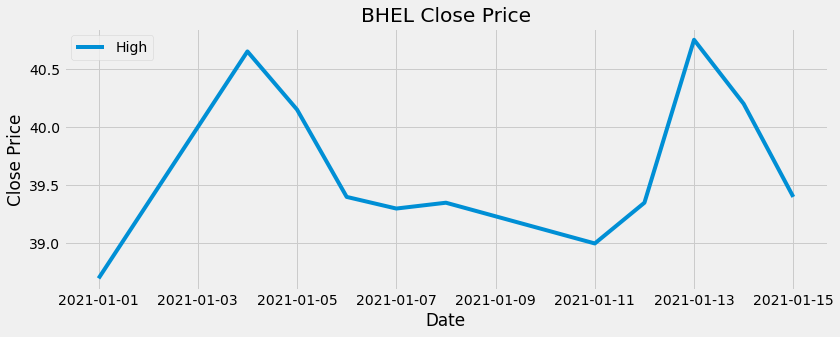

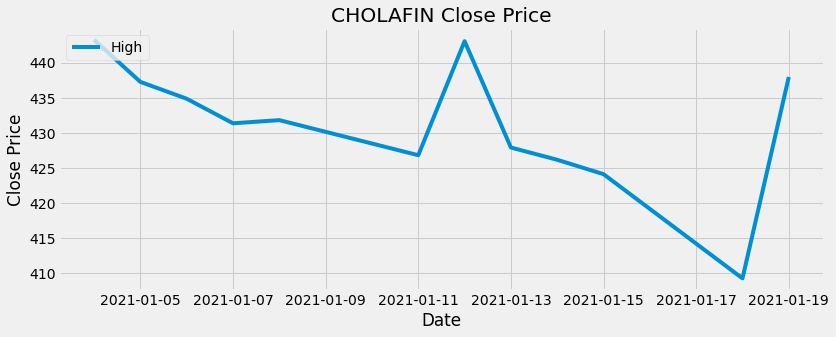

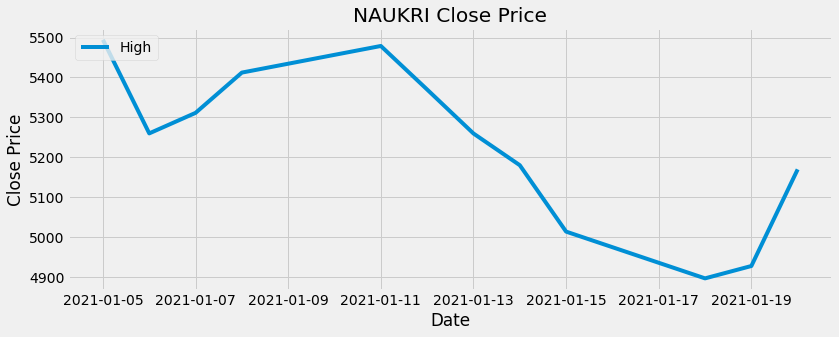

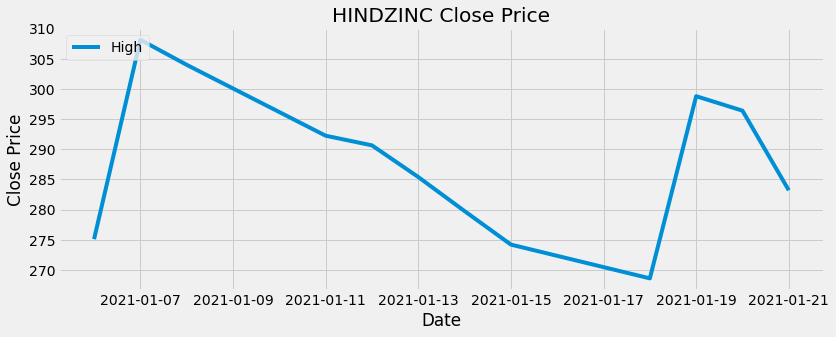

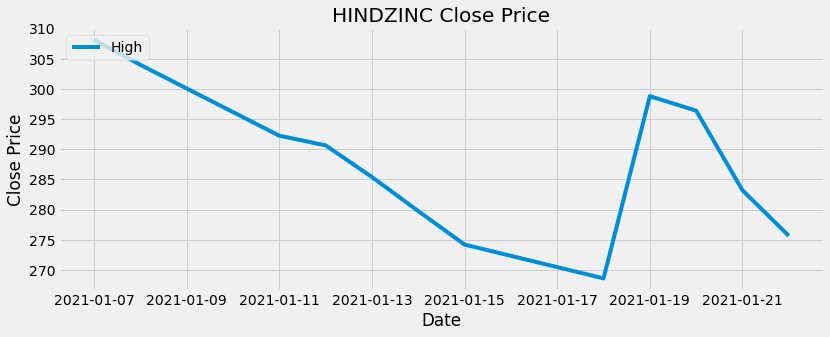

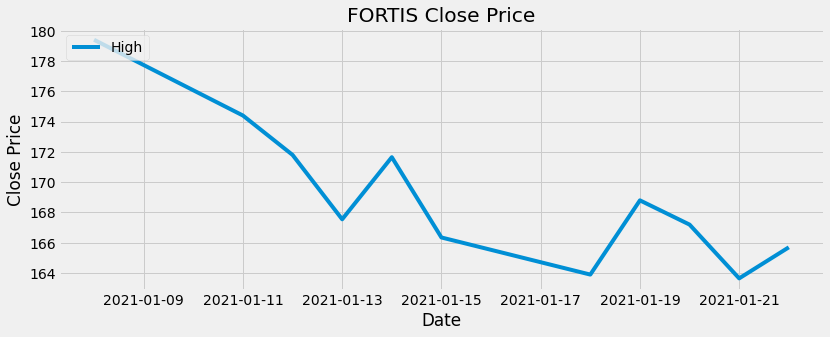

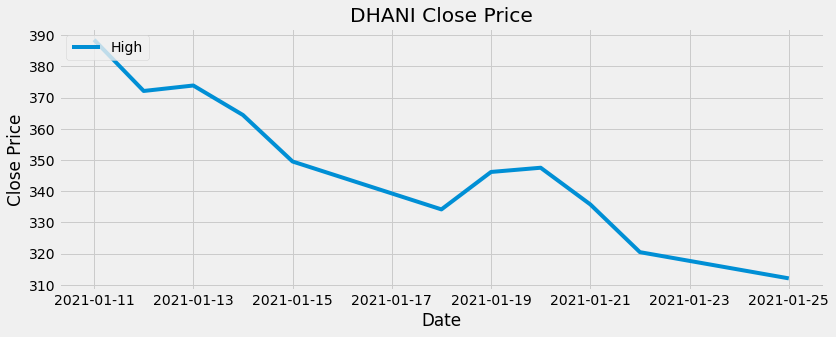

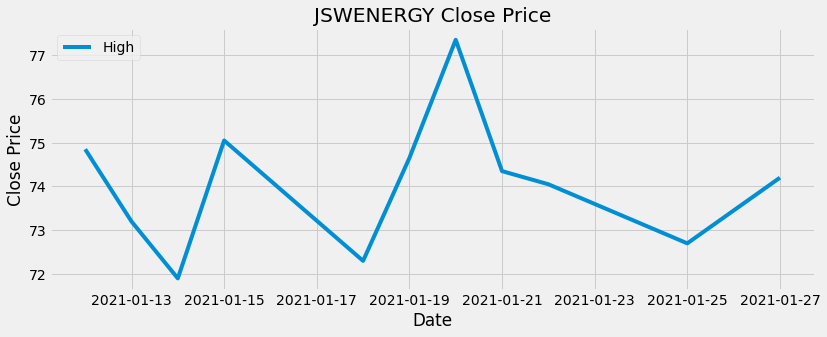

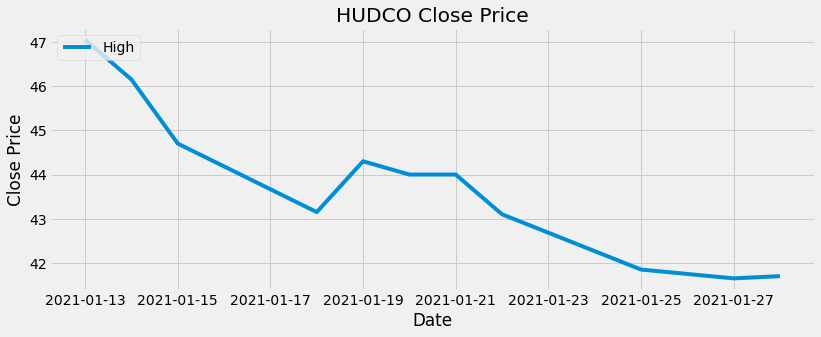

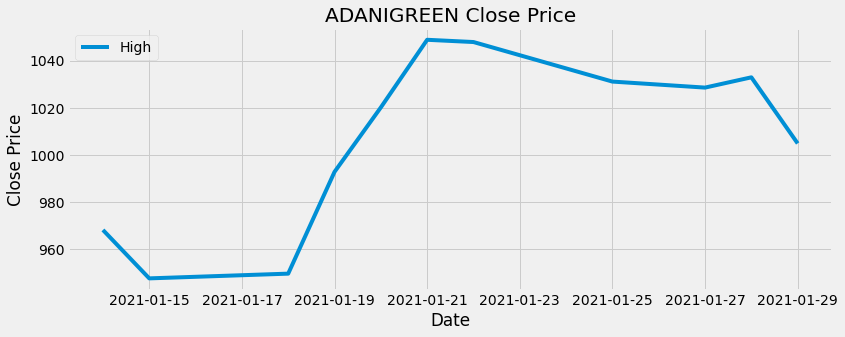

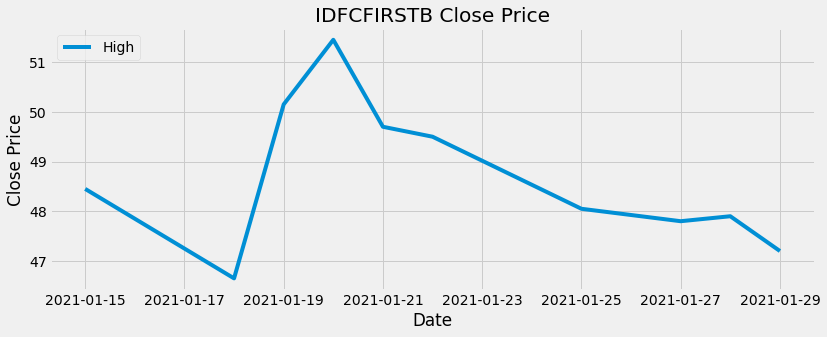

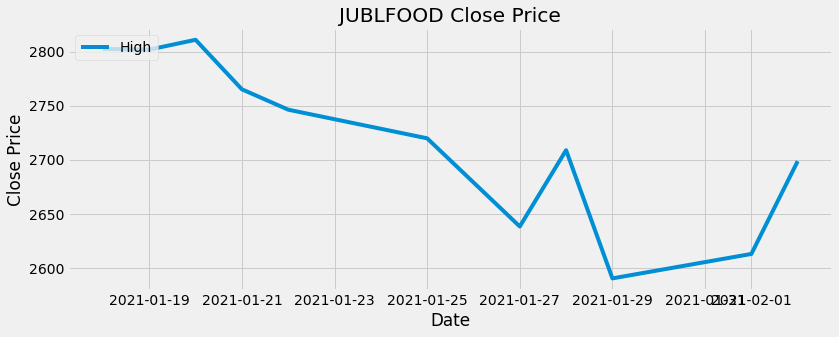

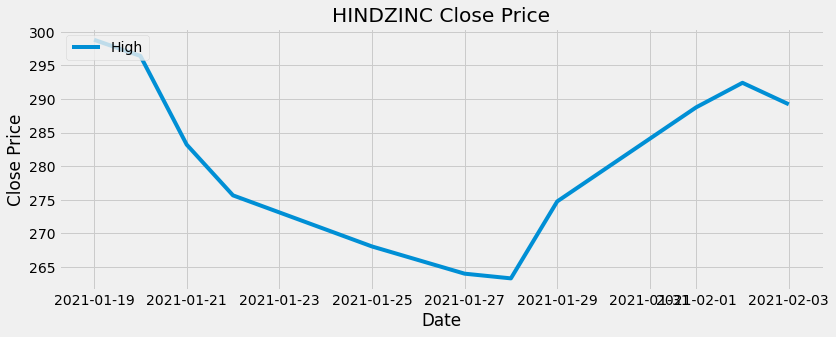

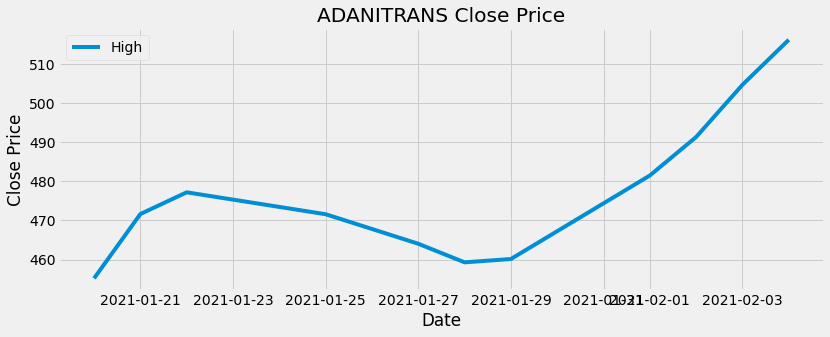

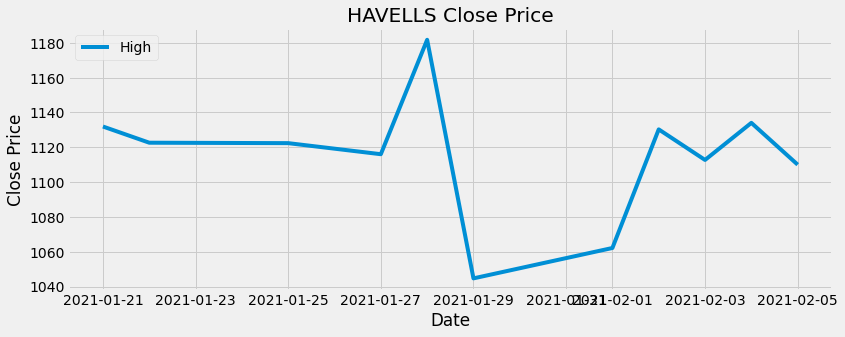

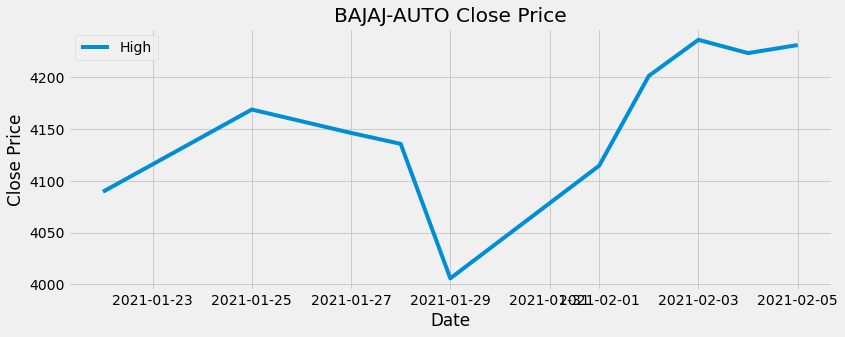

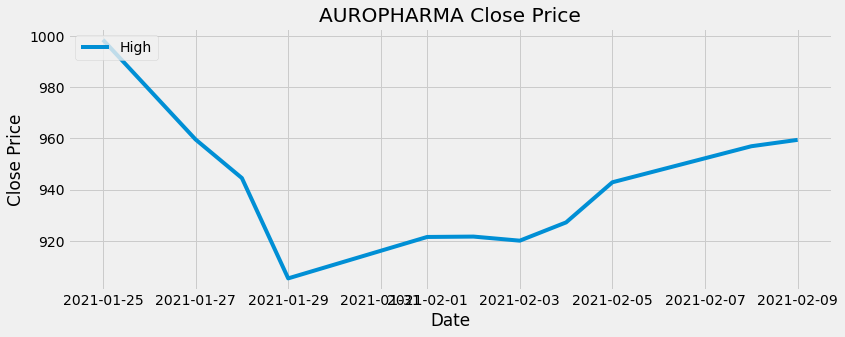

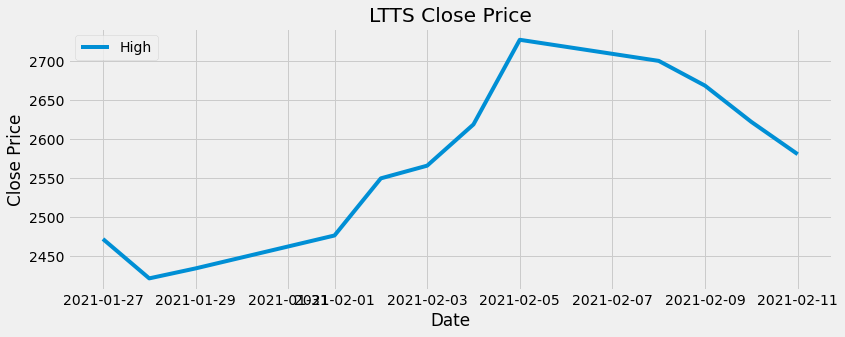

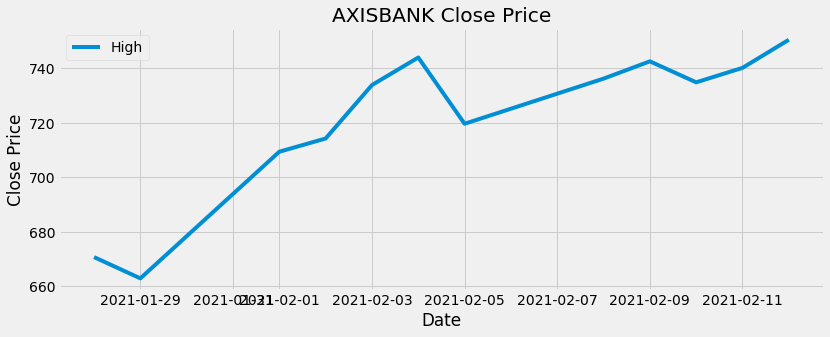

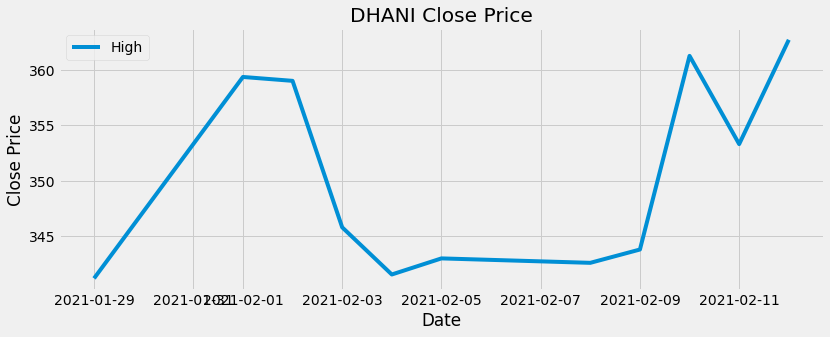

In [29]:
delta = datetime.timedelta(days=15)
for index, row in stock_data.iterrows():
    stock = pd.read_excel('Nifty500HistoricalStocksTill18052021/'+row['Top Gainer']+'.xlsx')
    stock.set_index('Date', inplace=True)
    stock = stock.loc[row['Date'] : row['Date']+delta]
    show_chart(stock, row['Top Gainer'])